In [4]:
import pandas as pd 
import numpy as np
from sklearn.metrics import classification_report ## show model report summary
from sklearn.neighbors import KNeighborsClassifier ## use to find the proper neighbor values
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import validation_curve
%matplotlib inline

In [5]:
data = pd.read_csv("DataPrep.csv")

In [6]:
data.head(5)

,Unnamed: 0,C.35 Ayutthaya (Chao Phraya R.),S.5 Ayutthaya (Pa Sak R.),C.7A Ang Thong (Chao Phraya R.),S.26 Tha Ruea (Pa Sak R.),C.13 Sapphaya (Chao Phraya r.),S.9 Kaeng Khoi (Pa Sak r.),C.35 river/brae,S.5 river/brae,C.7A river/brae,S.26 river/brae,date,critical_wat_lev_C.35,critical_wat_lev_S.5,Class_C.35,Class_S.5
0,0,0.74,0.79,1.02,0.70,0.0,0.0,0.161572,0.168085,0.102,0.08750,2020-08-18,3.2,3,0.0,0.0
1,1,0.68,0.76,0.87,0.65,0.0,2.0,0.148472,0.161702,0.087,0.08125,2020-08-19,3.2,3,0.0,0.0
2,2,0.30,0.64,0.85,0.64,0.0,0.5,0.065502,0.136170,0.085,0.08000,2020-08-20,3.2,3,0.0,0.0
3,3,0.33,0.67,0.90,0.73,3.0,1.5,0.072052,0.142553,0.090,0.09125,2020-08-21,3.2,3,0.0,0.0
4,4,0.62,0.59,0.90,0.79,8.0,12.5,0.135371,0.125532,0.090,0.09875,2020-08-22,3.2,3,0.0,0.0


In [191]:
data.isna().sum()

Unnamed: 0                         0
C.35 Ayutthaya (Chao Phraya R.)    0
S.5 Ayutthaya (Pa Sak R.)          0
C.7A Ang Thong (Chao Phraya R.)    0
S.26 Tha Ruea (Pa Sak R.)          0
C.13 Sapphaya (Chao Phraya r.)     0
S.9 Kaeng Khoi (Pa Sak r.)         0
C.35 river/brae                    0
S.5 river/brae                     0
C.7A river/brae                    0
S.26 river/brae                    0
date                               0
critical_wat_lev_C.35              0
critical_wat_lev_S.5               0
Class_C.35                         0
Class_S.5                          0
dtype: int64

In [7]:
X = data.drop(columns=['Unnamed: 0', 'C.35 Ayutthaya (Chao Phraya R.)', 'S.5 Ayutthaya (Pa Sak R.)', 'Class_C.35', 'Class_S.5','date'])
y = data[['Class_C.35', 'Class_S.5']]

In [193]:
y

,Class_C.35,Class_S.5
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
83,1.0,0.0
84,1.0,1.0
85,1.0,1.0
86,1.0,1.0


In [194]:
X

,C.7A Ang Thong (Chao Phraya R.),S.26 Tha Ruea (Pa Sak R.),C.13 Sapphaya (Chao Phraya r.),S.9 Kaeng Khoi (Pa Sak r.),C.35 river/brae,S.5 river/brae,C.7A river/brae,S.26 river/brae,critical_wat_lev_C.35,critical_wat_lev_S.5
0,1.02,0.70,0.0,0.0,0.161572,0.168085,0.102,0.08750,3.2,3
1,0.87,0.65,0.0,2.0,0.148472,0.161702,0.087,0.08125,3.2,3
2,0.85,0.64,0.0,0.5,0.065502,0.136170,0.085,0.08000,3.2,3
3,0.90,0.73,3.0,1.5,0.072052,0.142553,0.090,0.09125,3.2,3
4,0.90,0.79,8.0,12.5,0.135371,0.125532,0.090,0.09875,3.2,3
...,...,...,...,...,...,...,...,...,...,...
83,7.82,3.44,35.3,0.0,0.914847,0.589362,0.782,0.43000,3.2,3
84,8.31,3.97,5.5,0.5,0.984716,0.634043,0.831,0.49625,3.2,3
85,8.60,4.39,0.0,0.0,1.045852,0.682979,0.860,0.54875,3.2,3
86,8.86,5.38,0.0,0.0,1.085153,0.725532,0.886,0.67250,3.2,3


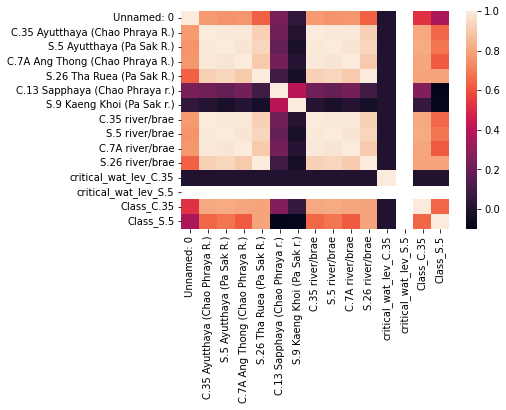

In [195]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.8, test_size = 0.2)

In [197]:
X_train

,C.7A Ang Thong (Chao Phraya R.),S.26 Tha Ruea (Pa Sak R.),C.13 Sapphaya (Chao Phraya r.),S.9 Kaeng Khoi (Pa Sak r.),C.35 river/brae,S.5 river/brae,C.7A river/brae,S.26 river/brae,critical_wat_lev_C.35,critical_wat_lev_S.5
55,0.99,0.72,1.1,0.5,0.163755,0.159574,0.099,0.09000,3.2,3
73,5.36,2.05,3.0,0.0,0.622271,0.408511,0.536,0.25625,3.2,3
11,1.04,0.75,0.0,0.0,0.165939,0.165957,0.104,0.09375,3.2,3
30,0.98,0.45,0.0,0.0,0.043668,0.104255,0.098,0.05625,3.2,3
40,1.01,0.99,0.0,40.0,0.189956,0.168085,0.101,0.12375,3.2,3
...,...,...,...,...,...,...,...,...,...,...
20,1.04,0.78,30.0,37.0,0.139738,0.117021,0.104,0.09750,3.2,3
60,1.25,0.82,0.0,0.0,0.207424,0.202128,0.125,0.10250,3.2,3
71,4.73,1.48,0.0,0.5,0.524017,0.325532,0.473,0.18500,3.2,3
14,1.08,0.70,0.0,3.0,0.183406,0.189362,0.108,0.08750,3.2,3


In [9]:
X_train_C = X_train.drop(columns=['S.26 Tha Ruea (Pa Sak R.)', 'S.9 Kaeng Khoi (Pa Sak r.)',
                        'S.5 river/brae', 'S.26 river/brae', 'critical_wat_lev_S.5'])
X_train_C

,C.7A Ang Thong (Chao Phraya R.),C.13 Sapphaya (Chao Phraya r.),C.35 river/brae,C.7A river/brae,critical_wat_lev_C.35
55,0.99,1.1,0.163755,0.099,3.2
73,5.36,3.0,0.622271,0.536,3.2
11,1.04,0.0,0.165939,0.104,3.2
30,0.98,0.0,0.043668,0.098,3.2
40,1.01,0.0,0.189956,0.101,3.2
...,...,...,...,...,...
20,1.04,30.0,0.139738,0.104,3.2
60,1.25,0.0,0.207424,0.125,3.2
71,4.73,0.0,0.524017,0.473,3.2
14,1.08,0.0,0.183406,0.108,3.2


In [10]:
X_test_C = X_test.drop(columns=['S.26 Tha Ruea (Pa Sak R.)', 'S.9 Kaeng Khoi (Pa Sak r.)',
                        'S.5 river/brae', 'S.26 river/brae', 'critical_wat_lev_S.5'])
X_test_C

,C.7A Ang Thong (Chao Phraya R.),C.13 Sapphaya (Chao Phraya r.),C.35 river/brae,C.7A river/brae,critical_wat_lev_C.35
76,5.22,22.0,0.604803,0.522,3.2
0,1.02,0.0,0.161572,0.102,3.2
26,1.09,0.0,0.109170,0.109,3.2
22,1.09,0.0,0.152838,0.109,3.2
12,1.07,0.0,0.181223,0.107,3.2
67,3.21,1.0,0.393013,0.321,3.2
10,0.96,21.4,0.159389,0.096,3.2
18,1.01,0.0,0.137555,0.101,3.2
4,0.90,8.0,0.135371,0.090,3.2
68,3.00,2.0,0.377729,0.300,3.2


In [11]:
X_train_C.dtypes

C.7A Ang Thong (Chao Phraya R.)    float64
C.13 Sapphaya (Chao Phraya r.)     float64
C.35 river/brae                    float64
C.7A river/brae                    float64
critical_wat_lev_C.35              float64
dtype: object

In [14]:
X_test_C.dtypes

C.7A Ang Thong (Chao Phraya R.)    float64
C.13 Sapphaya (Chao Phraya r.)     float64
C.35 river/brae                    float64
C.7A river/brae                    float64
critical_wat_lev_C.35              float64
dtype: object

In [12]:
y_train_C = y_train.drop(columns=['Class_S.5'])
y_train_C

,Class_C.35
55,0.0
73,0.0
11,0.0
30,0.0
40,0.0
...,...
20,0.0
60,0.0
71,0.0
14,0.0


In [15]:
y_test_C = y_test.drop(columns=['Class_S.5'])
y_test_C

,Class_C.35
76,0.0
0,0.0
26,0.0
22,0.0
12,0.0
67,0.0
10,0.0
18,0.0
4,0.0
68,0.0


In [16]:
X_train_S = X_train.drop(columns=['C.7A Ang Thong (Chao Phraya R.)', 'C.13 Sapphaya (Chao Phraya r.)',
                        'C.35 river/brae', 'C.7A river/brae', 'critical_wat_lev_C.35'])
X_train_S

,S.26 Tha Ruea (Pa Sak R.),S.9 Kaeng Khoi (Pa Sak r.),S.5 river/brae,S.26 river/brae,critical_wat_lev_S.5
55,0.72,0.5,0.159574,0.09000,3
73,2.05,0.0,0.408511,0.25625,3
11,0.75,0.0,0.165957,0.09375,3
30,0.45,0.0,0.104255,0.05625,3
40,0.99,40.0,0.168085,0.12375,3
...,...,...,...,...,...
20,0.78,37.0,0.117021,0.09750,3
60,0.82,0.0,0.202128,0.10250,3
71,1.48,0.5,0.325532,0.18500,3
14,0.70,3.0,0.189362,0.08750,3


In [17]:
X_test_S = X_test.drop(columns=['C.7A Ang Thong (Chao Phraya R.)', 'C.13 Sapphaya (Chao Phraya r.)',
                        'C.35 river/brae', 'C.7A river/brae', 'critical_wat_lev_C.35'])
X_test_S

,S.26 Tha Ruea (Pa Sak R.),S.9 Kaeng Khoi (Pa Sak r.),S.5 river/brae,S.26 river/brae,critical_wat_lev_S.5
76,1.70,0.0,0.408511,0.21250,3
0,0.70,0.0,0.168085,0.08750,3
26,0.72,0.0,0.163830,0.09000,3
22,0.81,0.0,0.131915,0.10125,3
12,0.74,0.0,0.180851,0.09250,3
67,1.50,25.5,0.287234,0.18750,3
10,0.80,0.0,0.144681,0.10000,3
18,0.72,0.0,0.121277,0.09000,3
4,0.79,12.5,0.125532,0.09875,3
68,1.97,0.0,0.291489,0.24625,3


In [18]:
X_train_S.dtypes

S.26 Tha Ruea (Pa Sak R.)     float64
S.9 Kaeng Khoi (Pa Sak r.)    float64
S.5 river/brae                float64
S.26 river/brae               float64
critical_wat_lev_S.5            int64
dtype: object

In [19]:
X_test_S.dtypes

S.26 Tha Ruea (Pa Sak R.)     float64
S.9 Kaeng Khoi (Pa Sak r.)    float64
S.5 river/brae                float64
S.26 river/brae               float64
critical_wat_lev_S.5            int64
dtype: object

In [20]:
y_train_S = y_train.drop(columns=['Class_C.35'])
y_train_S

,Class_S.5
55,0.0
73,0.0
11,0.0
30,0.0
40,0.0
...,...
20,0.0
60,0.0
71,0.0
14,0.0


In [21]:
y_test_S = y_test.drop(columns=['Class_C.35'])
y_test_S

,Class_S.5
76,0.0
0,0.0
26,0.0
22,0.0
12,0.0
67,0.0
10,0.0
18,0.0
4,0.0
68,0.0


# K-Nearest-Neighbor

# C.35

In [22]:
Knn = KNeighborsClassifier()
Knn.fit(X_train_C, y_train_C)

parameters = {

   'n_neighbors': [9,13,17,25,33,47,51,73]

 }

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=parameters , p=2,
 weights='uniform')

y_pred = Knn.predict(X_test_C)

In [23]:
print(classification_report(y_test_C, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        14
         1.0       0.00      0.00      0.00         4

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18



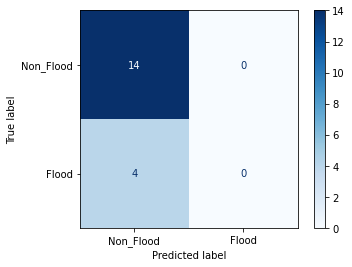

In [24]:
plot_confusion_matrix(Knn, X_test_C, y_test_C, display_labels=["Non_Flood", "Flood"], cmap=plt.cm.Blues)

# S.5

In [25]:
Knn.fit(X_train_S, y_train_S)
y_pred = Knn.predict(X_test_S)

In [26]:
print(classification_report(y_test_S, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        16
         1.0       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18



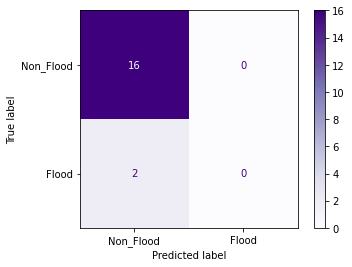

In [27]:
plot_confusion_matrix(Knn, X_test_S, y_test_S, display_labels=["Non_Flood", "Flood"], cmap=plt.cm.Purples)

# Logistic Regression


In [28]:
Lr = LogisticRegression()

## c.35

In [29]:
Lr.fit(X_train_C, y_train_C)

LogisticRegression()

In [30]:
y_pred_C = Lr.predict(X_test_C)
print(classification_report(y_test_C, y_pred_C))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        14
         1.0       1.00      0.50      0.67         4

    accuracy                           0.89        18
   macro avg       0.94      0.75      0.80        18
weighted avg       0.90      0.89      0.87        18



[[14  2]
 [ 0  2]]


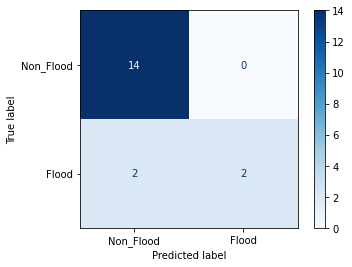

In [31]:
print(confusion_matrix(y_pred_C, y_test_C))
plot_confusion_matrix(Lr, X_test_C, y_test_C, display_labels=["Non_Flood", "Flood"], cmap=plt.cm.Blues)

## S.5

In [32]:
Lr.fit(X_train_S, y_train_S)

LogisticRegression()

In [33]:
y_pred_S = Lr.predict(X_test_S)
print(classification_report(y_test_S, y_pred_S))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        16
         1.0       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18



[[16  2]
 [ 0  0]]


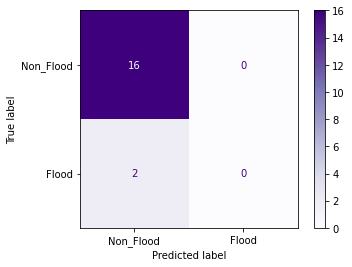

In [34]:
print(confusion_matrix(y_pred_S, y_test_S))
plot_confusion_matrix(Lr, X_test_S, y_test_S, display_labels=["Non_Flood", "Flood"], cmap=plt.cm.Purples)

# Apply SMOTE

In [35]:
overSampling = SMOTE(k_neighbors=2)

### C.35

In [36]:
X_over_C = X.drop(columns=['S.26 Tha Ruea (Pa Sak R.)', 'S.9 Kaeng Khoi (Pa Sak r.)',
                        'S.5 river/brae', 'S.26 river/brae', 'critical_wat_lev_S.5'])
y_over_C = y.drop(columns=['Class_S.5'])

In [37]:
X_over_C , y_over_C = overSampling.fit_resample(X_over_C, y_over_C)

In [38]:
X_over_C

,C.7A Ang Thong (Chao Phraya R.),C.13 Sapphaya (Chao Phraya r.),C.35 river/brae,C.7A river/brae,critical_wat_lev_C.35
0,1.020000,0.000000,0.161572,0.102000,3.2
1,0.870000,0.000000,0.148472,0.087000,3.2
2,0.850000,0.000000,0.065502,0.085000,3.2
3,0.900000,3.000000,0.072052,0.090000,3.2
4,0.900000,8.000000,0.135371,0.090000,3.2
...,...,...,...,...,...
153,8.943540,0.000000,1.109689,0.894354,3.2
154,6.266291,47.133947,0.730288,0.626629,3.2
155,6.860269,42.609866,0.800844,0.686027,3.2
156,8.619438,0.000000,1.048790,0.861944,3.2


In [39]:
y_over_C

,Class_C.35
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
153,1.0
154,1.0
155,1.0
156,1.0


In [40]:
X_over_train_C, X_over_test_C, y_over_train_C, y_over_test_C = train_test_split(X_over_C, y_over_C, test_size = 0.2)

### S.5

In [41]:
X_over_S = X.drop(columns=['C.7A Ang Thong (Chao Phraya R.)', 'C.13 Sapphaya (Chao Phraya r.)',
                        'C.35 river/brae', 'C.7A river/brae', 'critical_wat_lev_C.35'])
y_over_S = y.drop(columns=['Class_C.35'])

In [42]:
X_over_S

,S.26 Tha Ruea (Pa Sak R.),S.9 Kaeng Khoi (Pa Sak r.),S.5 river/brae,S.26 river/brae,critical_wat_lev_S.5
0,0.70,0.0,0.168085,0.08750,3
1,0.65,2.0,0.161702,0.08125,3
2,0.64,0.5,0.136170,0.08000,3
3,0.73,1.5,0.142553,0.09125,3
4,0.79,12.5,0.125532,0.09875,3
...,...,...,...,...,...
83,3.44,0.0,0.589362,0.43000,3
84,3.97,0.5,0.634043,0.49625,3
85,4.39,0.0,0.682979,0.54875,3
86,5.38,0.0,0.725532,0.67250,3


In [43]:
y_over_S

,Class_S.5
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
83,0.0
84,1.0
85,1.0
86,1.0


In [44]:
X_over_S , y_over_S = overSampling.fit_resample(X_over_S, y_over_S)

In [45]:
X_over_train_S, X_over_test_S, y_over_train_S, y_over_test_S = train_test_split(X_over_S, y_over_S, test_size = 0.2)

# K-Nearest-Nieghbor with using SMOTE

C.35

In [46]:
Knn.fit(X_over_train_C, y_over_train_C)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=parameters , p=2,
 weights='uniform')

y_pred = Knn.predict(X_over_test_C)

In [47]:
print(classification_report( y_over_test_C, y_pred,target_names=["Non_Flood", "Flood"]))

              precision    recall  f1-score   support

   Non_Flood       1.00      0.94      0.97        16
       Flood       0.94      1.00      0.97        16

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



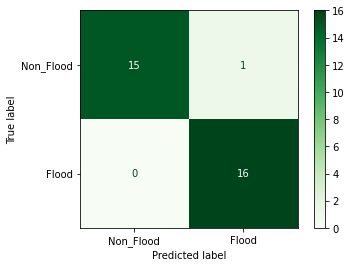

In [48]:
plot_confusion_matrix(Knn, X_over_test_C, y_over_test_C, display_labels=["Non_Flood", "Flood"], cmap=plt.cm.Greens)

# S.5

In [49]:
Knn.fit(X_over_train_S, y_over_train_S)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=parameters , p=2,
 weights='uniform')
y_pred = Knn.predict(X_over_test_S)

In [50]:
print(classification_report(y_over_test_S, y_pred,target_names=["Non_Flood", "Flood"]))

              precision    recall  f1-score   support

   Non_Flood       1.00      0.93      0.96        14
       Flood       0.95      1.00      0.98        20

    accuracy                           0.97        34
   macro avg       0.98      0.96      0.97        34
weighted avg       0.97      0.97      0.97        34



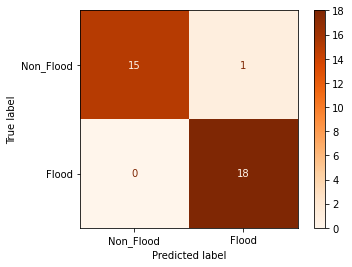

In [239]:
plot_confusion_matrix(Knn,X_over_test_S, y_over_test_S, display_labels=["Non_Flood", "Flood"], cmap=plt.cm.Oranges)

## Prediction using LR after SMOTE()
### C.35

In [51]:
Lr.fit(X_over_train_C, y_over_train_C)

LogisticRegression()

In [52]:
y_over_pred_C = Lr.predict(X_over_test_C)
print(classification_report(y_over_test_C, y_over_pred_C))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        16

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



[[16  0]
 [ 0 16]]


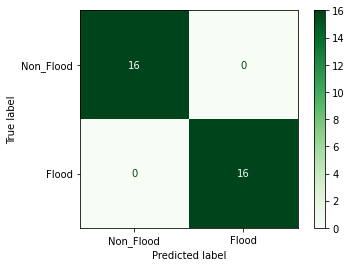

In [53]:
print(confusion_matrix(y_over_pred_C, y_over_test_C))
plot_confusion_matrix(Lr, X_over_test_C, y_over_test_C, display_labels=["Non_Flood", "Flood"], cmap=plt.cm.Greens)

### S.5

In [54]:
Lr.fit(X_over_train_S, y_over_train_S)

LogisticRegression()

In [55]:
y_over_pred_S = Lr.predict(X_over_test_S)
print(classification_report(y_over_test_S, y_over_pred_S))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       0.95      1.00      0.98        20

    accuracy                           0.97        34
   macro avg       0.98      0.96      0.97        34
weighted avg       0.97      0.97      0.97        34



[[13  0]
 [ 1 20]]


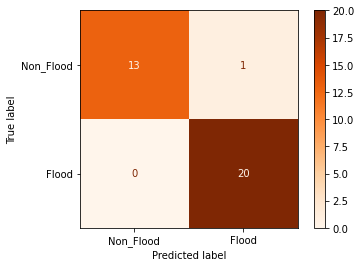

In [56]:
print(confusion_matrix(y_over_pred_S, y_over_test_S))
plot_confusion_matrix(Lr, X_over_test_S, y_over_test_S, display_labels=["Non_Flood", "Flood"], cmap=plt.cm.Oranges)

# AUC-ROC curve
## c.35

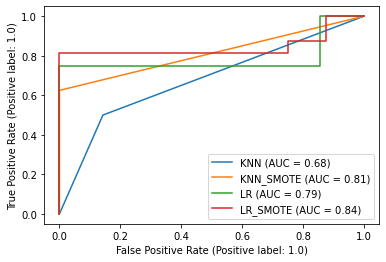

In [57]:
roc_fig = plt.figure()

ax = plt.gca()

# ROC plot of KNN
plot_roc_curve(Knn, X_test_C, y_test_C, ax=ax, name='KNN')

# ROC plot of KNN which is applied SMOTE
plot_roc_curve(Knn, X_over_test_C, y_over_test_C, ax=ax, name='KNN_SMOTE')

# ROC plot of Logistic Regression
plot_roc_curve(Lr, X_test_C, y_test_C, ax=ax, name='LR')

# ROC plot of Logistic Regression which is applied SMOTE
plot_roc_curve(Lr, X_over_test_C, y_over_test_C, ax=ax, name='LR_SMOTE')

## S.5

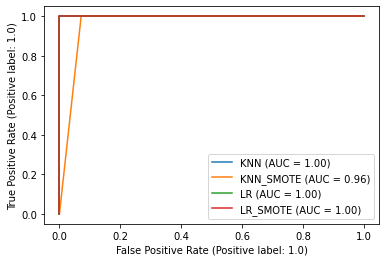

In [58]:
roc_fig_2 = plt.figure()

ax_2 = plt.gca()

# ROC plot of KNN
plot_roc_curve(Knn, X_test_S, y_test_S, ax=ax_2, name='KNN')

# ROC plot of KNN which is applied SMOTE
plot_roc_curve(Knn, X_over_test_S, y_over_test_S, ax=ax_2, name='KNN_SMOTE')

# ROC plot of Logistic Regression
plot_roc_curve(Lr, X_test_S, y_test_S, ax=ax_2, name='LR')

# ROC plot of Logistic Regression which is applied SMOTE
plot_roc_curve(Lr, X_over_test_S, y_over_test_S, ax=ax_2, name='LR_SMOTE')

**Validation Curve Visualization**

**C.35 CV for LR model**

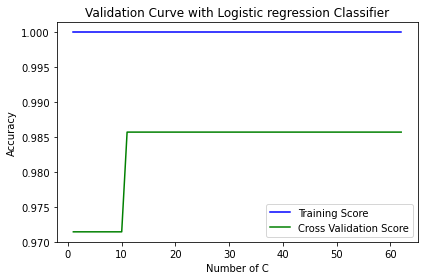

In [61]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 63, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 10-fold cross validation
train_score, test_score = validation_curve(Lr, X_train_C, y_train_C,
                                       param_name ="C",
                                       param_range = parameter_range,
                                        cv = 10, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
  label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
  label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with Logistic regression Classifier")
plt.xlabel("Number of C")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

**C.35 CV for LR model with applying SMOTE technique**

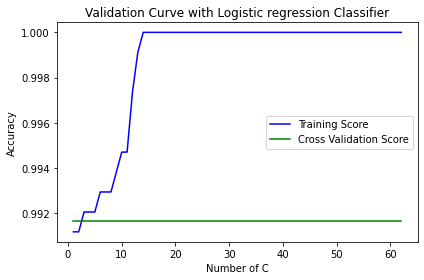

In [63]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 63, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 10-fold cross validation
train_score, test_score = validation_curve(Lr, X_over_train_C, y_over_train_C,
                                       param_name = "C",
                                       param_range = parameter_range,
                                        cv = 10, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
  label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
  label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with Logistic regression Classifier")
plt.xlabel("Number of C")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

**S.5 CV for LR model**

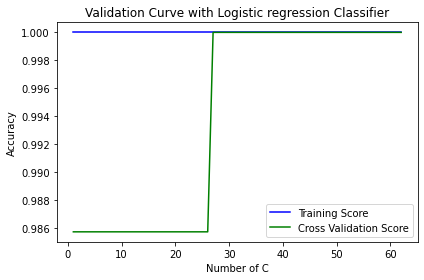

In [64]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 63, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 10-fold cross validation
train_score, test_score = validation_curve(Lr, X_train_S, y_train_S,
                                       param_name = "C",
                                       param_range = parameter_range,
                                        cv = 10, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
  label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
  label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with Logistic regression Classifier")
plt.xlabel("Number of C")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

**S.5 CV for LR model with applying SMOTE technique**

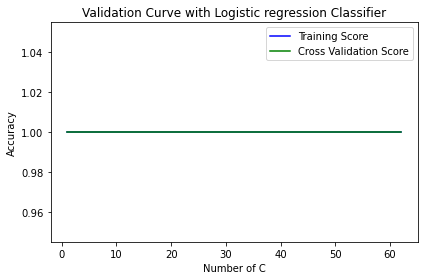

In [65]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 63, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 10-fold cross validation
train_score, test_score = validation_curve(Lr, X_over_train_S, y_over_train_S,
                                       param_name = "C",
                                       param_range = parameter_range,
                                        cv = 10, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
  label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
  label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with Logistic regression Classifier")
plt.xlabel("Number of C")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

**C.35 CV for KNN model**

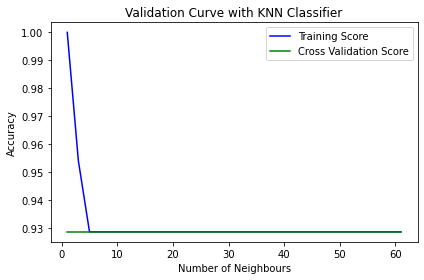

In [66]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 63, 2)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 10-fold cross validation
train_score, test_score = validation_curve(Knn, X_train_C, y_train_C,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 10, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
  label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
  label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

**C.35 CV for KNN model with applying SMOTE technique**

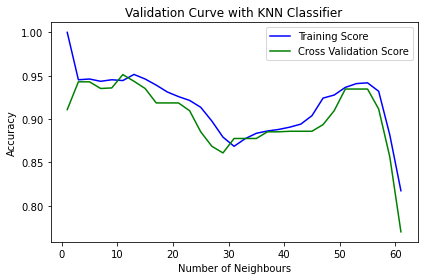

In [67]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 63, 2)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 10-fold cross validation
train_score, test_score = validation_curve(Knn, X_over_train_C, y_over_train_C,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 10, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
  label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
  label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

**S.5 CV for KNN model**

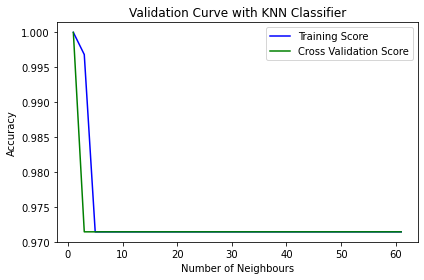

In [68]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 63, 2)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 10-fold cross validation
train_score, test_score = validation_curve(Knn, X_train_S, y_train_S,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 10, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
  label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
  label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

**S.5 CV for KNN model with applying SMOTE techique**

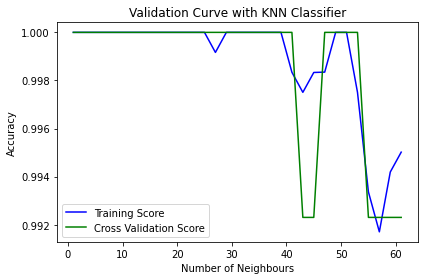

In [69]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 63, 2)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 10-fold cross validation
train_score, test_score = validation_curve(Knn, X_over_train_S, y_over_train_S,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 10, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
  label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
  label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()